https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 자전거 대여량 예측 모델 

In [ ]:
# LinearRegression,RandomForestRegressor
# GradientBoostingRegressor, XGBRegressor, LGBMRegressor

datetime - 년-월-일-24시간   
season -  1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울   
holiday - 해당 요일이 휴일인지 여부. 0 = 평일(no), 1 = 휴일(휴)     
workingday - 해당 요일이 주말이나 휴일이 아닌지 여부. 0 = 휴일(no), 1 = 평일(일)    
weather - 1: 맑음, 구름 약간, 부분적으로 구름, 부분적으로 구름   
2: 안개 + 구름, 안개 + 깨진 구름, 안개 + 구름 약간, 안개   
3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름   
4: 폭우 + 얼음판 + 뇌우 + 안개, 눈 + 안개    
temp - 섭씨 온도   
atemp - 체감 온도   
섭씨 humid - 상대 습도   
windspeed - 풍속    

casual - 등록된 사용자가 시작한 대여 수   
registered - 등록된 사용자가 시작한 대여 수   
count - 총 대여 수 

<br/>
<br/>

# 0. 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

<br/>
<br/>

# 데이터 불러오기

In [99]:
df_test = pd.read_csv('data/bike-sharing-demand/test.csv')
df_train = pd.read_csv('data/bike-sharing-demand/train.csv')
df_sample = pd.read_csv('data/bike-sharing-demand/sampleSubmission.csv')

In [100]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


datetime - 년-월-일-24시간   
season -  1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울   
holiday - 해당 요일이 휴일인지 여부. 0 = 평일(no), 1 = 휴일(휴)     
workingday - 해당 요일이 주말이나 휴일이 아닌지 여부. 0 = 휴일(no), 1 = 평일(일)    
weather - 1: 맑음, 구름 약간, 부분적으로 구름, 부분적으로 구름   
2: 안개 + 구름, 안개 + 깨진 구름, 안개 + 구름 약간, 안개   
3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름   
4: 폭우 + 얼음판 + 뇌우 + 안개, 눈 + 안개    
temp - 섭씨 온도   
atemp - 체감 온도   
섭씨 humid - 상대 습도   
windspeed - 풍속    

casual - 등록된 사용자가 시작한 대여 수   
registered - 등록된 사용자가 시작한 대여 수   
count - 총 대여 수 

<br/>
<br/>

# 데이터 전처리

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\2798349113.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\2798349113.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Weekday', 'Holiday'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\2798349113.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Holiday/Weekend', 'Working Day'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\2798349113.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(

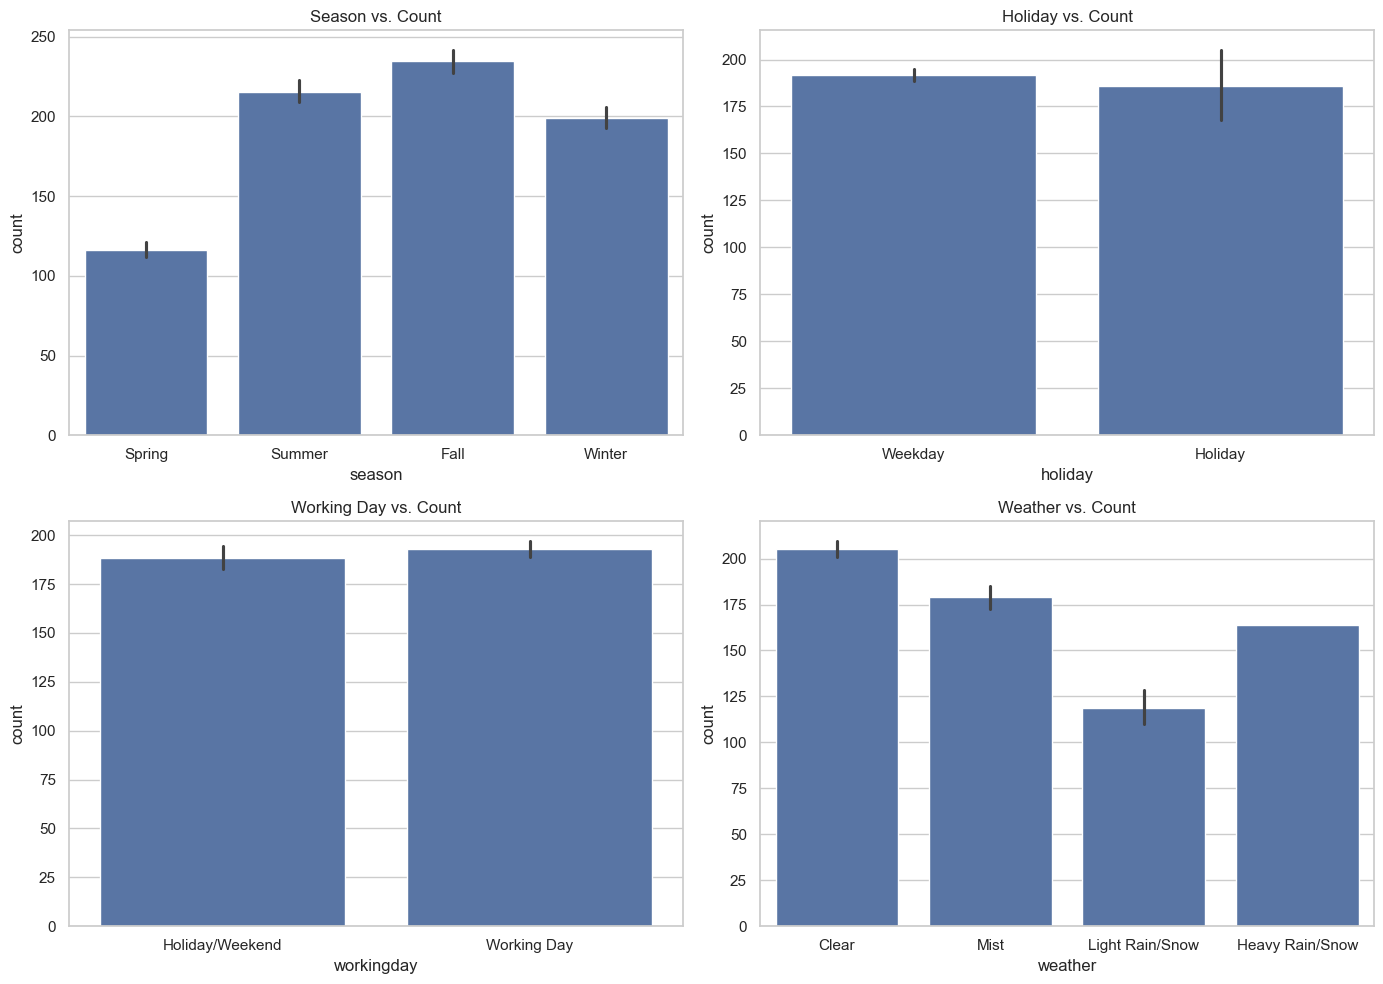

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 스타일 설정
sns.set(style="whitegrid")

# season, holiday, workingday, weather 별 count 평균 막대그래프
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(data=df_train, x="season", y="count", ax=axes[0, 0])
axes[0, 0].set_title('Season vs. Count')
axes[0, 0].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])

sns.barplot(data=df_train, x="holiday", y="count", ax=axes[0, 1])
axes[0, 1].set_title('Holiday vs. Count')
axes[0, 1].set_xticklabels(['Weekday', 'Holiday'])

sns.barplot(data=df_train, x="workingday", y="count", ax=axes[1, 0])
axes[1, 0].set_title('Working Day vs. Count')
axes[1, 0].set_xticklabels(['Holiday/Weekend', 'Working Day'])

sns.barplot(data=df_train, x="weather", y="count", ax=axes[1, 1])
axes[1, 1].set_title('Weather vs. Count')
axes[1, 1].set_xticklabels(['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])

plt.tight_layout()
plt.show()

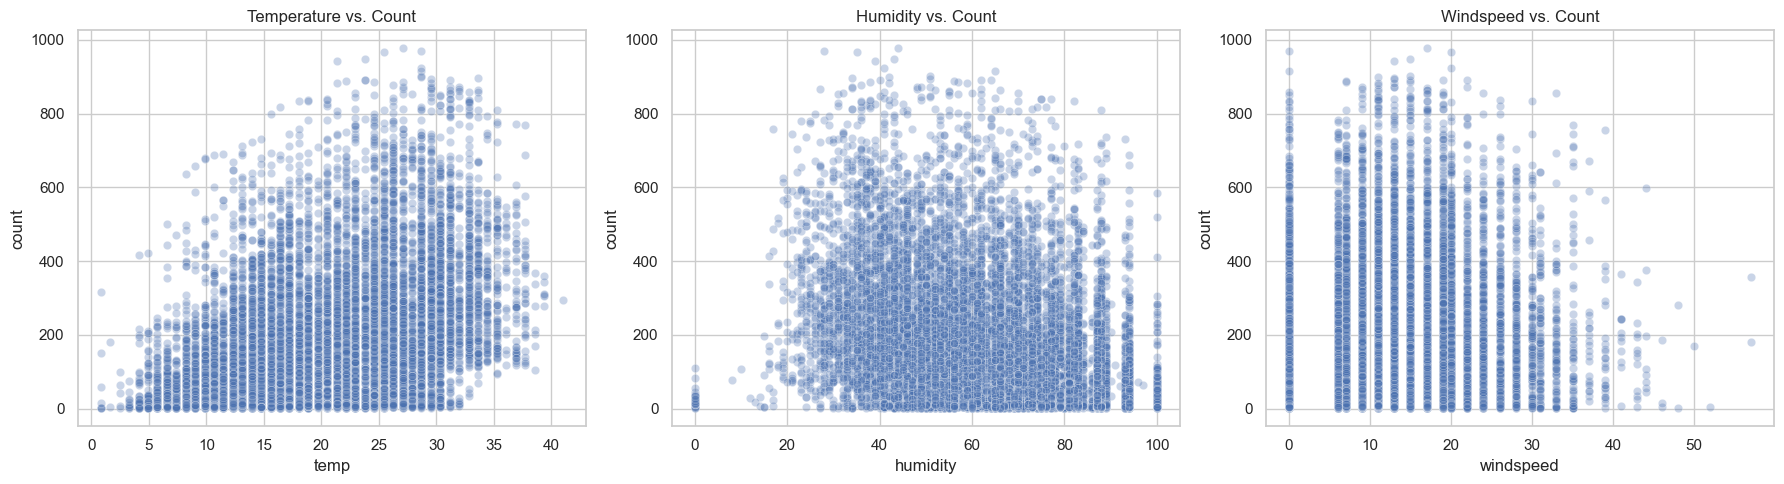

In [91]:
# temp, humidity, windspeed 별 count 산점도
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df_train, x="temp", y="count", ax=axes[0], alpha=0.3)
axes[0].set_title('Temperature vs. Count')

sns.scatterplot(data=df_train, x="humidity", y="count", ax=axes[1], alpha=0.3)
axes[1].set_title('Humidity vs. Count')

sns.scatterplot(data=df_train, x="windspeed", y="count", ax=axes[2], alpha=0.3)
axes[2].set_title('Windspeed vs. Count')

plt.tight_layout()
plt.show()

<br/>
<br/>

# 모델 만들기

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
df = pd.read_csv('data/bike-sharing-demand/train.csv')  # 실제 파일 경로로 수정

# 2. datetime 처리
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df.drop('datetime', axis=1, inplace=True)

# 3. casual, registered 제거
df.drop(['casual', 'registered'], axis=1, inplace=True)

# 4. X, y 분리
y = df['count']
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'year', 'month']]

# 5. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

for name, model in models.items():
    # 학습
    model.fit(X_train, y_train)
    # 예측
    y_pred = model.predict(X_test)
    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}")

LinearRegression -> R2: 0.2402, MAE: 118.1562, MSE: 24725.4107
Ridge -> R2: 0.2402, MAE: 118.1554, MSE: 24725.5134
Lasso -> R2: 0.2402, MAE: 118.1537, MSE: 24725.4714
ElasticNet -> R2: 0.2373, MAE: 118.1277, MSE: 24817.7543
DecisionTree -> R2: 0.2745, MAE: 109.3264, MSE: 23608.6506
RandomForest -> R2: 0.3080, MAE: 106.8736, MSE: 22518.2129
GradientBoosting -> R2: 0.3210, MAE: 110.4794, MSE: 22093.2671
SVR -> R2: -0.0705, MAE: 136.5671, MSE: 34833.9108


--- 

<br/>
<br/>

# 모델 만들기

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. 데이터 로드 (예시)
# df_train = pd.read_csv('train.csv')

# --- 2. 데이터 전처리 및 피처 엔지니어링 ---

# datetime 컬럼 변환 및 년, 월, 시간 피처 생성
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['hour'] = df_train['datetime'].dt.hour

# 사용할 피처 선택
feature_columns = ['year', 'month', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']
X = df_train[feature_columns]
y = df_train['count']

# 타겟 변수 로그 변환
y_log = np.log1p(y)

# 데이터 분리
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 피처 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 3. 모델 학습 및 평가 ---

# 모델 임포트
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

results = {}

for name, model in models.items():
    # 모델 학습
    model.fit(X_train_scaled, y_train_log)
    
    # 예측 및 역변환
    y_pred_log = model.predict(X_test_scaled)
    y_pred = np.expm1(y_pred_log)
    y_test = np.expm1(y_test_log)
    
    y_pred[y_pred < 0] = 0
    
    # 평가 지표 계산
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # --- RMSE 계산 코드 추가 ---
    
    # 결과 저장 (RMSE 포함)
    results[name] = {"R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse} # --- 결과 딕셔너리에 RMSE 추가 ---

# --- 4. 결과 출력 ---

results_df = pd.DataFrame(results).T
print("머신러닝 모델 성능 비교")
print(results_df)

머신러닝 모델 성능 비교
                         R²         MAE           MSE        RMSE
Linear Regression  0.216171  108.246738  25871.780935  160.847073
Ridge              0.216198  108.244544  25870.917798  160.844390
Lasso              0.216202  108.239235  25870.780863  160.843964
ElasticNet         0.217384  108.155572  25831.757286  160.722610
Decision Tree      0.901061   36.148200   3265.665264   57.146000
Random Forest      0.941028   27.494778   1946.492644   44.119073
Gradient Boosting  0.862006   41.830627   4554.773159   67.489060
SVR                0.608383   67.381660  12926.090678  113.692967


In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 모델 라이브러리 임포트
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('data/bike-sharing-demand/train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

In [120]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [127]:
# 2. 독립변수(X)와 종속변수(y) 분리
X = df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','hour']]
y = df['count']

# 3. 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 스케일링 적용 
# ==========================================================
scaler = StandardScaler()
# 스케일링을 적용할 컬럼 목록
numeric_features = ['temp', 'atemp', 'humidity', 'windspeed']


# 5. 모델 5개 학습 및 평가
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

results = []

for name, model in models.items():
    # 모델 학습 (DataFrame을 NumPy 배열로 변환하여 전달)
    model.fit(X_train.values, y_train.values)
    
    # 예측 (DataFrame을 NumPy 배열로 변환하여 전달)
    y_pred = model.predict(X_test.values)
    
    # 성능 평가
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append([name, r2, rmse])

# 6. 결과 정리 및 출력
results_df = pd.DataFrame(results, columns=['Model', 'R-squared', 'RMSE'])
results_df.reset_index(drop=True, inplace=True)

In [ ]:
# 스케일링 전 - 전체 컬럼 
results_df

,Model,R-squared,RMSE
0,Linear Regression,0.395871,141.210609
1,Ridge,0.395872,141.210524
2,Lasso,0.395704,141.230159
3,Random Forest,0.954571,38.722806
4,LightGBM,0.958613,36.960280


In [ ]:
# 스케일링 전 - 선택 컬럼
results_df

,Model,R-squared,RMSE
0,Linear Regression,0.395361,141.270292
1,Ridge,0.395361,141.270205
2,Lasso,0.395362,141.270131
3,Random Forest,0.944289,42.881957
4,LightGBM,0.948480,41.237311


In [128]:
# 스케일링 후 - 선택 컬럼
results_df

,Model,R-squared,RMSE
0,Linear Regression,0.395361,141.270292
1,Ridge,0.395361,141.270205
2,Lasso,0.395362,141.270131
3,Random Forest,0.944289,42.881957
4,LightGBM,0.948480,41.237311


In [131]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 모델 임포트
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 1. 데이터 준비 (이전 단계와 동일)
df = pd.read_csv('data/bike-sharing-demand/train.csv')

# datetime 컬럼 전처리
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['hour'] = df_train['datetime'].dt.hour

# 피처(X)와 타겟(y) 정의
feature_columns = ['year', 'month', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']
X = df_train[feature_columns]
y = df_train['count']

# 타겟 변수 로그 변환
y_log = np.log1p(y)

# 데이터 분리 및 스케일링
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 2. 모델 정의
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42)
}

# 3. 모델 학습 및 평가 (R²와 RMSE만 계산)
results = {}

for name, model in models.items():
    # 모델 학습
    model.fit(X_train_scaled, y_train_log)
    
    # 예측 및 원래 스케일로 복원
    y_pred_log = model.predict(X_test_scaled)
    y_pred = np.expm1(y_pred_log)
    y_test = np.expm1(y_test_log)
    
    y_pred[y_pred < 0] = 0
    
    # R²와 RMSE 계산
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # 결과 저장
    results[name] = {"R²": r2, "RMSE": rmse}

# 4. 결과 출력
results_df = pd.DataFrame(results).T
results_df

,R²,RMSE
Linear Regression,0.216171,160.847073
Random Forest,0.941028,44.119073
Gradient Boosting,0.862006,67.489060
XGBoost,0.943633,43.133390
LightGBM,0.939083,44.840471
